In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

In [3]:
df = pd.read_csv('dataset/bank_marketing_clean.csv')

In [4]:
df_process = df.copy()

In [5]:
# separation variable num et categorielles

var_num = df_process.select_dtypes(exclude='object').columns
var_cat = df_process.select_dtypes(include='object').columns

In [6]:
# Normalisation des variables numeriques

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(df_process[var_num])
df_process[var_num] = X_scaled

In [7]:
# encodage des variables categorielles binaire seulement

# Sélectionner les colonnes binaires
bin_col = [col for col in var_cat if df_process[col].nunique() == 2]

# Retirer 'contact' de la liste
bin_col.remove('contact')

# Mapper les valeurs 'yes' et 'no' en 1 et 0
for col in bin_col:
    df_process[col] = df_process[col].map({'yes': 1, 'no': 0})


In [8]:
# encodage des variables categorielles multiclasses par 'onehotencoder'
cat_cols = df_process.select_dtypes(include=['object']).columns.difference(bin_col)

encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_encoded = encoder.fit_transform(df_process[cat_cols])

cat_encoded_df = pd.DataFrame(cat_encoded, columns= encoder.get_feature_names_out(cat_cols))
df_process = pd.concat([df_process.drop(columns=cat_cols), cat_encoded_df], axis = 1)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df_process.to_csv('modeling_data.csv', index = False)

In [11]:
df_process

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0.571429,0,0,0,0.053070,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.581633,0,0,0,0.030297,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.377551,0,1,0,0.045954,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.408163,0,0,0,0.030704,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.571429,0,0,1,0.062424,0.017857,-0.037037,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.744898,0,1,0,0.067914,0.017857,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41172,0.469388,0,0,0,0.077877,0.017857,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41173,0.571429,0,1,0,0.038430,0.035714,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41174,0.448980,0,0,0,0.089874,0.017857,-0.037037,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  float64
 1   default                        41176 non-null  int64  
 2   housing                        41176 non-null  int64  
 3   loan                           41176 non-null  int64  
 4   duration                       41176 non-null  float64
 5   campaign                       41176 non-null  float64
 6   pdays                          41176 non-null  float64
 7   previous                       41176 non-null  float64
 8   emp.var.rate                   41176 non-null  float64
 9   cons.price.idx                 41176 non-null  float64
 10  cons.conf.idx                  41176 non-null  float64
 11  euribor3m                      41176 non-null  float64
 12  nr.employed                    41176 non-null 

In [13]:
# separation des variables explicatives et variable cible

X = df_process.drop('y', axis = 1)
y = df_process['y']

In [14]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Fitting 5 folds for each of 112 candidates, totalling 560 fits
# Best Parameters:  {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
# Best Score:  0.9117486338797814

In [16]:
# remedier l'equilibre de classe par 'SMOTE' 

# Définir SMOTE et le modèle de régression logistique
smote = SMOTE(random_state=42)
logreg = LogisticRegression(C=100, penalty='l2', solver='liblinear', max_iter=100) # d'apres gridsearch

# Créer un pipeline avec SMOTE, RFECV et la régression logistique
pipeline = Pipeline([
    ('smote', smote),
    ('feature_selection', RFECV(estimator=logreg,
                                step=1,
                                cv=StratifiedKFold(5),
                                scoring='accuracy',
                                verbose=2)),
    ('logreg', logreg)
])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# evaluation sur X_train
train_score = pipeline.score(X_train, y_train)
print("Train Score: ", train_score)

# evaluation sur X_test
test_score = pipeline.score(X_test, y_test)
print("Test Score: ", test_score)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

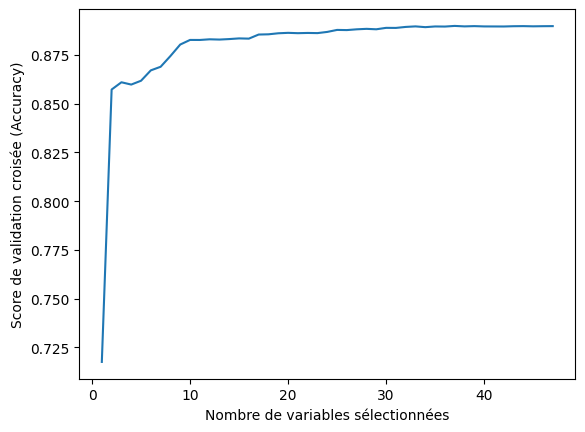

In [17]:
# Obtenir les variables sélectionnées
selector = pipeline.named_steps['feature_selection']

# Liste des variables sélectionnées
selected_features = X_train.columns[selector.support_]

# visualisation le nombre optimal de variables
plt.figure()
plt.xlabel("Nombre de variables sélectionnées")
plt.ylabel("Score de validation croisée (Accuracy)")
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.show()

In [18]:
len(selected_features)

37

In [19]:
# mise a jour X_train et X_test

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [28]:
# Créer un  nouveau pipeline avec SMOTE et la régression logistique
new_pipeline = Pipeline([
    ('smote', smote),
    ('logreg', logreg)
])

# Entraîner le modèle
new_pipeline.fit(X_train_selected, y_train)

# Prédire sur l'ensemble de test
y_pred = new_pipeline.predict(X_test_selected)

# evaluation sur X_test
test_score = new_pipeline.score(X_test_selected, y_test)
print("Test Score: ", test_score)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

Test Score:  0.8607333657115105
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7265
           1       0.45      0.86      0.59       971

    accuracy                           0.86      8236
   macro avg       0.72      0.86      0.75      8236
weighted avg       0.92      0.86      0.88      8236



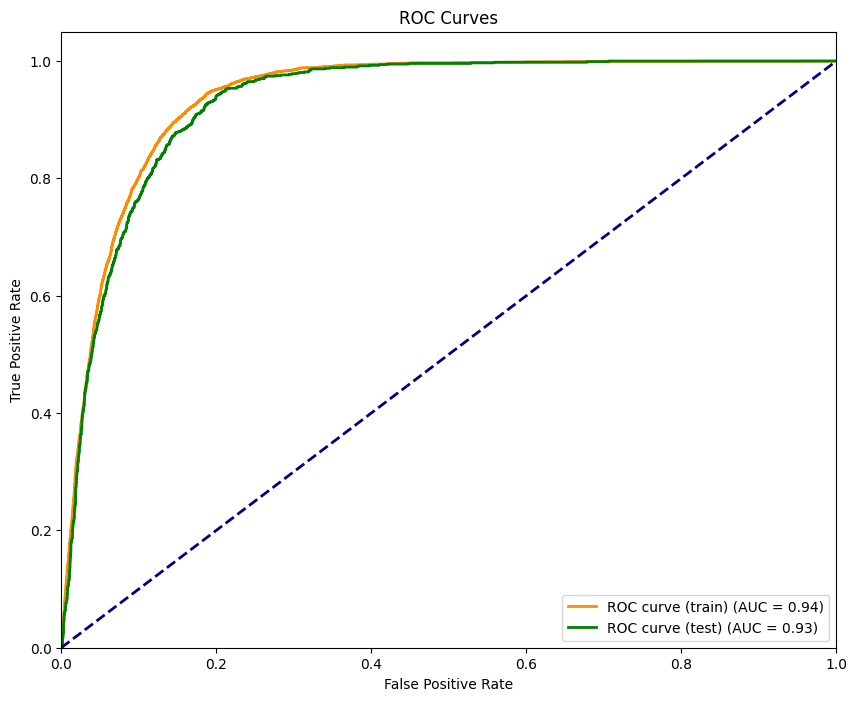

In [23]:
# Obtenir les probabilités pour la classe positive
y_train_proba = new_pipeline.predict_proba(X_train_selected)[:, 1]
y_test_proba = new_pipeline.predict_proba(X_test_selected)[:, 1]

# courbes ROC et l'AUC pour train et test
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

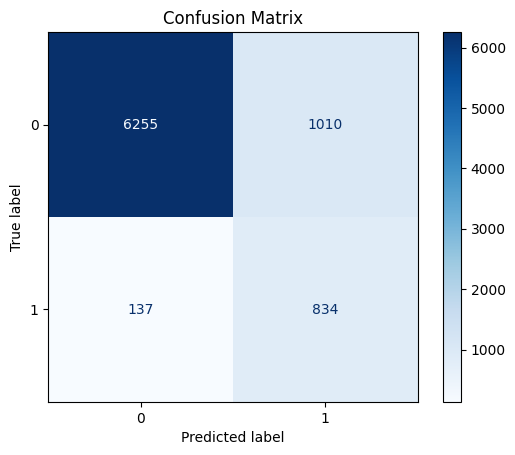

In [24]:
# matrice de de confusion 
cm = confusion_matrix(y_test, y_pred)

# Plot matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

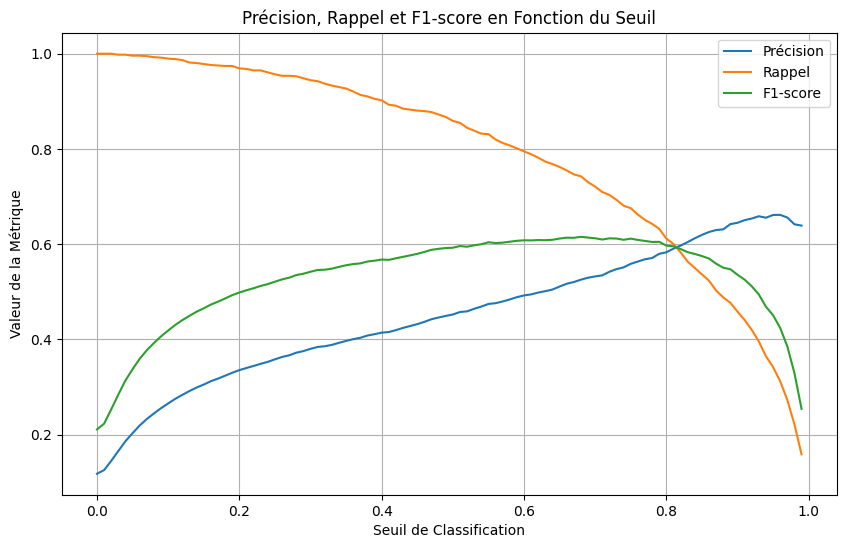

In [25]:
# Optimisation du seuil en maximisant le f1-score

thresholds = np.arange(0.0, 1.0, 0.01)

precisions = []
rappels = []
f1_scores = []

for i in thresholds:
    # Convertir les probabilités en prédictions binaires basées sur le seuil
    y_pred_thresholds = (y_test_proba >= i).astype(int)
    
    # Calculer les métriques
    precisions.append(precision_score(y_test, y_pred_thresholds))
    rappels.append(recall_score(y_test, y_pred_thresholds))
    f1_scores.append(f1_score(y_test, y_pred_thresholds))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Précision')
plt.plot(thresholds, rappels, label='Rappel')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Seuil de Classification')
plt.ylabel('Valeur de la Métrique')
plt.title('Précision, Rappel et F1-score en Fonction du Seuil')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# F1-score maximal
indice_max_f1 = np.argmax(f1_scores)
threshold_optimal = thresholds[indice_max_f1]

# Générer les prédictions au seuil optimal
y_pred_optimal = (y_test_proba >= threshold_optimal).astype(int)

# evaluation sur X_test
test_score = new_pipeline.score(X_test_selected, y_pred_optimal)
print("Test Score: ", test_score)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred_optimal))



Test Score:  0.9426906265177271
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7265
           1       0.53      0.74      0.62       971

    accuracy                           0.89      8236
   macro avg       0.74      0.83      0.78      8236
weighted avg       0.91      0.89      0.90      8236



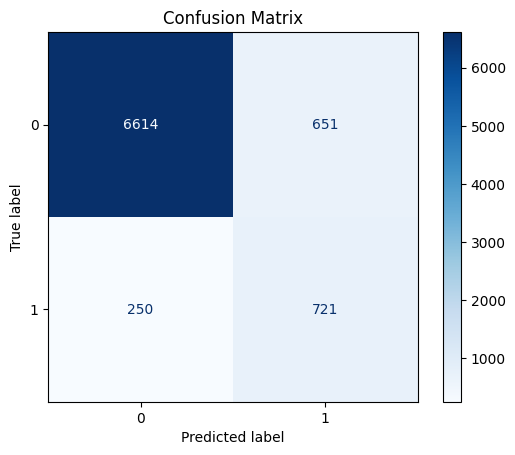

In [30]:
# matrice de de confusion 
cm = confusion_matrix(y_test, y_pred_optimal)

# Plot matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

C:\Users\RASAMISON Lovatiana\AppData\Local\Temp\ipykernel_34772\1649082498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


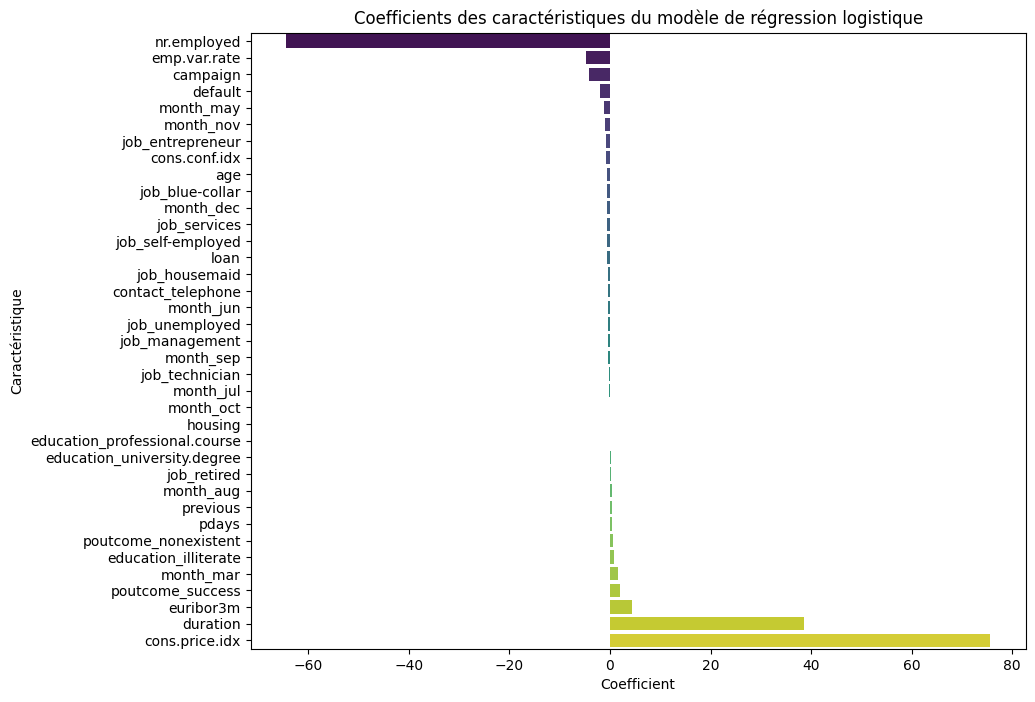

In [31]:
# explication du modele

# Afficher les coefficients du modèle
feature_names = X_train_selected.columns
coefficients = pipeline.named_steps['logreg'].coef_[0]

# Créer un DataFrame pour organiser les coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', inplace=True)

# Tracer les coefficients en utilisant seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Coefficients des caractéristiques du modèle de régression logistique')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristique')
plt.show()

In [32]:
coef_df

,Feature,Coefficient
12,nr.employed,-64.463536
8,emp.var.rate,-4.851926
5,campaign,-4.199687
1,default,-1.911614
31,month_may,-1.194654
32,month_nov,-0.993959
18,job_entrepreneur,-0.725519
10,cons.conf.idx,-0.714226
0,age,-0.638079
17,job_blue-collar,-0.631557
